In [75]:
%matplotlib inline

In [1]:
import sympy
import numpy as np
import matplotlib.pyplot as plt

import itertools

# I will be using numpy.polynomial package instead of the legacy polynomial module.
# See https://numpy.org/doc/stable/reference/routines.polynomials.html for details.
# import numpy.polynomial.polynomial as p
from numpy.polynomial import Polynomial



# Demos Algebra Fundamentals

## Polynoms

In [156]:
# Define data points
points = np.array([(2, 3), (-1, -1), (-3, 5), ])

# Extract x and y coordinates
x = points[:, 0]
y = points[:, 1]

Method 1 below is recommended by numpy documentation.

However, the coefficients seem wrong

In [171]:
# Fit the unique polynom of a degree = len(points) - 1

# # Method 1 (recommended): Using numpy.polynomial
# poly = Polynomial.fit(x, y, len(points) - 1, window=[0, 10])
# print(type(poly))
# print(poly)

# Method 2 (legacy): using numpy.poly1d class and numpy.lib.polynomial
coefficients = np.polyfit(x, y, len(points) - 1)
print(type(coefficients))
print(coefficients)

poly = np.poly1d(coefficients)
print(type(poly))
print(poly)


<class 'numpy.ndarray'>
[ 0.86666667  0.46666667 -1.4       ]
<class 'numpy.poly1d'>
        2
0.8667 x + 0.4667 x - 1.4


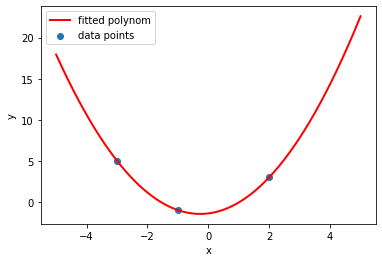

In [202]:
# Generate values for x and calculate the corresponding polynom values (=y)
x_plot = np.linspace(-5,5,1000)
y_plot = poly(x_plot)

# Plot the fitted polynom (line) and the initial data points (scatter)
plt.plot(x_plot, y_plot, 'r', label='fitted polynom', linewidth=2)
plt.scatter(x, y, label='data points')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [173]:
def interpolate_polynomial(points, degree):
    """
    Interpolates a polynomial of the specified degree through the given points and plots it.
    points - a list of points (x, y) to plot
    degree - the polynomial degree
    min_x, max_x - range of x values used to plot the interpolating polynomial
    """
    # extracting the x and y coordinates
    x = points[:, 0]
    y = points[:, 1]
    
    # fitting a polynom
    coefficients = np.polyfit(x, y, degree)
    poly = np.poly1d(coefficients)
    
    return poly

In [174]:
def plot_function(func, min_x, max_x, num_points):
    """
    Draws a line plot of a function with 
    """
    # generating values for x and calculating the corresponding polynom values (y)
    x_plot = np.linspace(min_x, max_x, num_points)
    y_plot = func(x_plot)

    # plotting the fitted polynom (line) and the initial data points (scatter)
    plt.plot(x_plot, y_plot, 'r', label='fitted polynom', linewidth=2)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()
    
    
def plot_data_points_and_fitted_polynom(points):
    pass

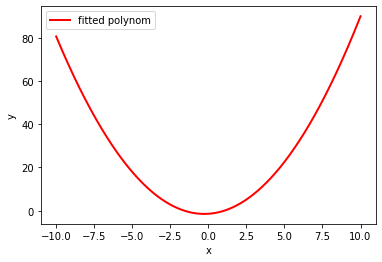

In [175]:
points = np.array([(2, 3), (-1, -1), (-3, 5), ])
deg = len(points) - 1
poly = interpolate_polynomial(points, deg)

min_x, max_x = -10, 10
plot_function(poly, min_x, max_x, 1000)


## Complex Numbers

In [176]:
z1 = 2 + 3j
z2 = 3 - 5j
z1 + z2

(5-2j)

In [184]:
type(z1)

complex

In [185]:
repr(z1)

'(2+3j)'

In [186]:
str(z1)

'(2+3j)'

In [187]:
z1

(2+3j)

In [190]:
z1.conjugate

<function complex.conjugate>

In [193]:
print(z1, z1.conjugate())

(2+3j) (2-3j)


In [196]:
z1.imag

3.0

In [197]:
type(z1.imag)

float

In [200]:
dir(z1)

['__abs__',
 '__add__',
 '__bool__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getnewargs__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__le__',
 '__lt__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rdivmod__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rfloordiv__',
 '__rmod__',
 '__rmul__',
 '__rpow__',
 '__rsub__',
 '__rtruediv__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__truediv__',
 'conjugate',
 'imag',
 'real']

## Demo: Itertools Groupby

In [68]:
def print_groupby(iterable, keyfunc=lambda x:x):
    grouped = itertools.groupby(iterable, keyfunc)
    for k, g in grouped:
        print(f'{k}: ', end = '')
        for el in g:
            print(el, end=', ')
        print()

In [66]:
def get_groupby_sizes(iterable, keyfunc=lambda x:x):
    grouped = itertools.groupby(iterable, keyfunc)
    res = []
    for k, g in grouped:
        res.append((k, sum(1 for _ in g)))
    
    return res

In [60]:
text = "AABCCCDEEEE"
get_groupby_sizes(text)

[('A', 2), ('B', 1), ('C', 3), ('D', 1), ('E', 4)]

In [61]:
text = "AABCCCBBBDEEEEAAA"
print_groupby(text)

A: A, A, 
B: B, 
C: C, C, C, 
B: B, B, B, 
D: D, 
E: E, E, E, E, 
A: A, A, A, 


In [65]:
ll = [('dairy', 'milk'), ('meat', 'port'), ('meat', 'beef'), ('dairy', 'cheese'), ]
keyfunc = lambda x: x[0]

print(get_groupby_sizes(ll, keyfunc))
print_groupby(ll, keyfunc)

print()

ll.sort()
print(get_groupby_sizes(ll, keyfunc))
print_groupby(ll, keyfunc)   

[('dairy', 1), ('meat', 2), ('dairy', 1)]
dairy: ('dairy', 'milk'), 
meat: ('meat', 'port'), ('meat', 'beef'), 
dairy: ('dairy', 'cheese'), 

[('dairy', 2), ('meat', 2)]
dairy: ('dairy', 'cheese'), ('dairy', 'milk'), 
meat: ('meat', 'beef'), ('meat', 'port'), 
